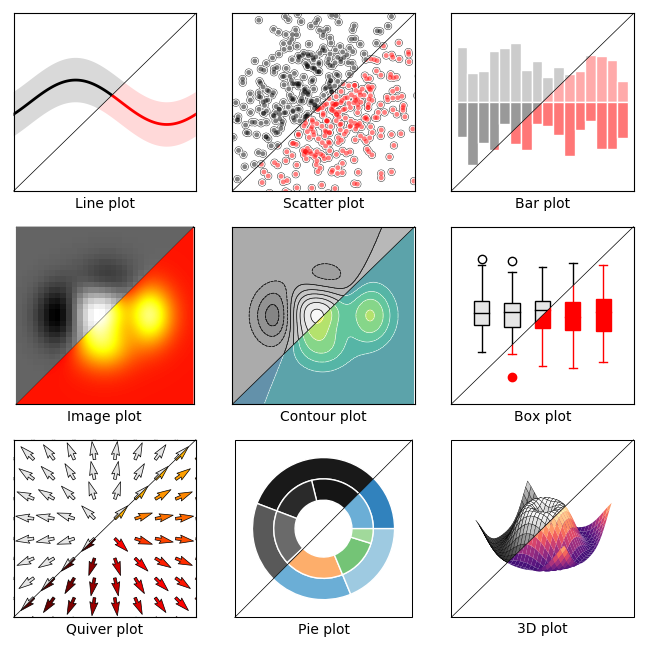

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.text import Text
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Polygon

plt.rcParams['figure.dpi'] = 100

def clip_path(ax):
    T1 = [(0,0),(0,1),(1,1)]
    T2 = [(0,0),(1,0),(1,1)]
    clip1 = Polygon(T1, closed=True, transform=ax.transAxes,
                   edgecolor='None', facecolor='None')
    clip2 = Polygon(T2, closed=True, transform=ax.transAxes,
                   edgecolor='None', facecolor='None')

    line = Line2D([0, 1], [0, 1], transform=ax.transAxes, linewidth=0.5,
                  color="black", clip_on=False, zorder=50)
    ax.add_artist(line)

    return clip1, clip2

    
def scatter(ax):
    np.random.seed(123)
    n = 500
    X = np.random.normal(0, 0.5, n)
    Y = np.random.normal(0, 0.5, n)
    S = 25

    clip1, clip2 = clip_path(ax)
    
    ax.scatter(X, Y, S, clip_path=clip1,
               linewidth=0.75, facecolor="None",  edgecolor=".25")
    ax.scatter(X, Y, S, clip_path=clip1,
               linewidth=0.00, facecolor="white", edgecolor="None")
    ax.scatter(X, Y, S/2, clip_path=clip1,
               linewidth=0.00, facecolor="black", edgecolor="None", alpha=0.5)

    ax.scatter(X, Y, S, clip_path=clip2,
               linewidth=0.75, facecolor="None",  edgecolor=".25")
    ax.scatter(X, Y, S, clip_path=clip2,
               linewidth=0.00, facecolor="white", edgecolor="None")
    ax.scatter(X, Y, S/2, clip_path=clip2,
               linewidth=0.00, facecolor="red", edgecolor="None", alpha=0.5)

    ax.set_xlabel("Scatter plot")
    

def lineplot(ax):
    ax.set_xlabel("Line plot")

    clip1, clip2 = clip_path(ax)
    
    X = np.linspace(-1,1,100)
    Y = 0.25*np.cos(1+np.pi*X)
    ax.plot(X, Y, color="black", linewidth=2, clip_path=clip1)
    ax.fill_between(X, Y+0.25, Y-0.25, clip_path=clip1,
                    facecolor="black", edgecolor="None", alpha=0.15)

    X = np.linspace(-1,1,100)
    Y = 0.25*np.cos(1+np.pi*X)
    ax.plot(X, Y, color="red", linewidth=2, clip_path=clip2)
    ax.fill_between(X, Y+0.25, Y-0.25, clip_path=clip2,
                    facecolor="red", edgecolor="None", alpha=0.15)
    

def quiverplot(ax):
    clip1, clip2 = clip_path(ax)
    
    n = 10
    X,Y = np.mgrid[0:n, 0:n]
    X,Y = 2*X/(n-1)-1, 2*Y/(n-1)-1
    T = np.arctan2(Y, X)
    U, V = np.cos(T), np.sin(T)
    ax.quiver(X, Y, 0.1*U, 0.1*V, scale=1, width=0.015, clip_path=clip1,
              edgecolor='black', facecolor='.9', linewidth=.5)

    ax.quiver(X, Y, 0.1*U, 0.1*V, T-1, scale=1, width=0.015, clip_path=clip2,
              edgecolor='black', linewidth=.5, cmap="hot")

    ax.set_xlabel("Quiver plot")

def contourplot(ax):

    clip1, clip2 = clip_path(ax)
    
    def f(x,y): return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)
    n = 100
    x = np.linspace(-3,3,n)
    y = np.linspace(-3,3,n)
    X,Y = np.meshgrid(x,y)
    Z = f(X,Y)

    CF = ax.contourf(Z, 10, extent=[-1,+1,-1,+1], alpha=.5, 
                     origin="upper", cmap="gray", zorder=-10)
    for collection in CF.collections:
        collection.set_clip_path(clip1)
   
    CS = ax.contour(Z, 10, extent=[-1,+1,-1,+1], 
                    colors="black", linewidths=.5, origin="upper")
    for collection in CS.collections:
        collection.set_clip_path(clip1)

    CF = ax.contourf(Z, 10, extent=[-1,+1,-1,+1], alpha=.75, 
                     origin="upper", cmap="viridis", zorder=-10)
    for collection in CF.collections:
        collection.set_clip_path(clip2)
    
    CS = ax.contour(Z, 10, extent=[-1,+1,-1,+1], 
                    colors="white", linewidths=.5, origin="upper")
    for collection in CS.collections:
        collection.set_clip_path(clip2)

    ax.set_xlabel("Contour plot")

def imageplot(ax):
    def f(x,y): return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)
    n = 32
    x = np.linspace(-3,3,n)
    y = np.linspace(-3,3,n)
    X,Y = np.meshgrid(x,y)
    Z = f(X,Y)

    clip1, clip2 = clip_path(ax)
    ax.imshow(Z, extent=[-1,+1,-1,+1], origin="upper", zorder=50,
              cmap="gray", interpolation="nearest", clip_path=clip1)
    ax.imshow(Z, extent=[-1,+1,-1,+1], origin="upper", 
              cmap="hot", interpolation="bicubic", clip_path=clip2)


    ax.set_xlabel("Image plot")

def pieplot(ax):
    clip1, clip2 = clip_path(ax)

    size = 0.3
    vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

    cmap = plt.get_cmap("gray")
    outer_colors = cmap(.1+np.arange(3)/4)
    inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10])/12)

    patches, _ = ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
                        wedgeprops=dict(width=size, edgecolor='w'))
    for patch in patches:
        patch.set_clip_on(True)
        patch.set_clip_path(clip1)
    patches, _ = ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
                        wedgeprops=dict(width=size, edgecolor='w'))
    for patch in patches:
        patch.set_clip_on(True)
        patch.set_clip_path (clip1)

    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap(+np.arange(3))
    inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
    patches, _ = ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
                        wedgeprops=dict(width=size, edgecolor='w'))
    for patch in patches:
        patch.set_clip_on(True)
        patch.set_clip_path(clip2)
    patches, _ = ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
                        wedgeprops=dict(width=size, edgecolor='w'))
    for patch in patches:
        patch.set_clip_on(True)
        patch.set_clip_path (clip2)
    
    rect = Rectangle((0,0), 1, 1, transform=ax.transAxes, linewidth=0.75,
                     edgecolor="black", facecolor="None", clip_on=False)
    ax.add_artist(rect)

    ax.set_xlabel("Pie plot")

def threedplot(ax):

    T1 = [(0,0),(0,1),(1,1)]
    T2 = [(0,0),(1,0),(1,1)]
    clip1 = Polygon(T1, closed=True, transform=ax.transAxes,
                   edgecolor='None', facecolor='None')
    clip2 = Polygon(T2, closed=True, transform=ax.transAxes,
                   edgecolor='None', facecolor='None')

    ax.set_axis_off()
    ax.set_xlim(-1, 1), ax.set_ylim(-1, 1), ax.set_zlim(-2, 2)
    X,Y= np.meshgrid(np.linspace(-1, 1, 25),
                     np.linspace(-1, 1, 25))
    Z = np.sin(5*np.sqrt(X**2+Y**2))

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="gray", clip_path=clip1,
                    linewidth=.25, edgecolor="black", vmin=-1.5, vmax=1)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="magma", clip_path=clip2,
                    linewidth=0, edgecolor="black", vmin=-1.5, vmax=1)

    line = Line2D([0, 1], [0, 1], transform=ax.transAxes, linewidth=0.5,
                  color="black", clip_on=False, zorder=10)
    ax.add_artist(line)
    
    rect = Rectangle((0,0), 1, 1, transform=ax.transAxes, linewidth=0.75,
                     edgecolor="black", facecolor="None", clip_on=False)
    ax.add_artist(rect)
    text = Text(0.5, -0.025, "3D plot", clip_on=False,
                ha="center", va="top", transform=ax.transAxes)
    ax.add_artist(text)
    
    
def barplot(ax):
    clip1, clip2 = clip_path(ax)

    n = 16
    X = np.arange(n)
    Y1 = (1-0.25*X/n) * np.random.uniform(0.25, 0.75, n)
    Y2 = (1-0.25*X/n) * np.random.uniform(0.25, 0.75, n)
    ax.bar(X, +Y1, 1, facecolor='#cccccc', edgecolor='white', clip_path=clip1)
    ax.bar(X, -Y2, 1, facecolor='#999999', edgecolor='white', clip_path=clip1)
    ax.bar(X, +Y1, 1, facecolor='#ffaaaa', edgecolor='white', clip_path=clip2)
    ax.bar(X, -Y2, 1, facecolor='#ff7777', edgecolor='white', clip_path=clip2)
    ax.set_xlim(-1,n)
    ax.set_xlabel("Bar plot")

def boxplot(ax):
    clip1, clip2 = clip_path(ax)

    n = 5
    data = np.random.normal(0, .25, (100,n))

    bplots = ax.boxplot(data, patch_artist=True)
    for patch in bplots['boxes']:
        patch.set_facecolor("0.9")
    for line in bplots['medians']:
        line.set_color("black")
    for element in ["boxes","medians","whiskers", "caps", "fliers","means"]:
        for item in bplots[element]:
            item.set_clip_path(clip1)

    bplots = ax.boxplot(data, patch_artist=True)
    
    for patch in bplots['boxes']:
        patch.set_facecolor("0.9")
    for line in bplots['medians']:
        line.set_color("black")
    for element in ["boxes","medians","whiskers", "caps", "fliers","means"]:
        for item in bplots[element]:
            item.set_color("red")
            try:
                item.set_markerfacecolor ("red")
                item.set_markeredgecolor ("red")
            except:
                pass
            item.set_clip_path(clip2)

            
    ax.set_xlim(0,n+1), ax.set_xticks([])
    ax.set_xlabel("Box plot")


fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for ax in axes.ravel():
    ax.set(xticks=[], yticks=[], xlim=[-1,1], ylim=[-1,1])
axes[2,2] = plt.subplot(339, projection="3d")

lineplot(axes[0,0])
scatter(axes[0,1])
barplot(axes[0,2])

imageplot(axes[1,0])
contourplot(axes[1,1])
boxplot(axes[1,2])

quiverplot(axes[2,0])
pieplot(axes[2,1])
threedplot(axes[2,2])

plt.savefig("catalogue.pdf")
plt.show()

> many reference & image from [matplotlib cheatsheet](https://github.com/rougier/matplotlib-cheatsheet)

***This is a notebook which organizes various tips and contents of matplotlib which we browse every day.***

I am a developer who loves visualization.

So far I've built a kernel to share the tips I've gained from doing a lot of visualizations.

**matplotlib** is the most basic visualization tool, and even if you use it well, sometimes you don't need to use the rest of the visualization tools.

### Table of Contents 


0. **Setting**
    - dpi
    - figsize
    - title
1. **Alignments**
    - subplots, tight_layout
    - subplot2grid
    - add_axes
    - add_gridspec
2. **Colormap**
    - diverging
    - qualitative
    - sequential
    - scientific
3. **Text & Annotate & Patch**
    - parameter
    - text example
    - patches example
4. **Details & Example** 
    - font weight, color, size, etc
    - Horizontal and Vertical (barplot)
    - Border(edge) color and thickness
    - Main Color & Sub Color
    - Transparency
    - Span
5. **MEME**
    - xkcd style

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Alignments 

import seaborn as sns # theme & dataset
print(f"Matplotlib Version : {mpl.__version__}")
print(f"Seaborn Version : {sns.__version__}")

# for visualization samples
import pandas as pd

netflix_titles = pd.read_csv("../input/netflix-shows/netflix_titles.csv")

Matplotlib Version : 3.0.3
Seaborn Version : 0.9.0


## 0. Setting 

Set the resolution through the **dpi** (Dots per Inch) setting of the figure.
matplotlib has a low default resolution itself, so setting this up is a bit more professional.

`plt.rcParams['figure.dpi'] = 200` or `dpi=200`

And for every plot set **figsize**.
The graph gives a very different feeling depending on the ratio. (I think it's best to try this heuristic multiple times.)

There are many places in matplotlib where you can write **titles** based on objects such as `plt.title ()`, `ax.set_title ()`, `fig.suptitle()`. If you add a title that takes into account font size and font family, fontweight, position, etc., it will be more readable.

## 1. Alignments

> The first nine graph plots (3 by 3) are a combination of matplotlib layout and design.

- `subplots`
- `subplot2grid`
- `add_axes`
- `gridspec`, `add_subplot`
- `inset_axes` (TBD)

Two or more graphs are much more visually and semantically better than just one.

The easiest way to do this is to place the rectangles of the same shape.

Usually you can start with the initial size with subplots.

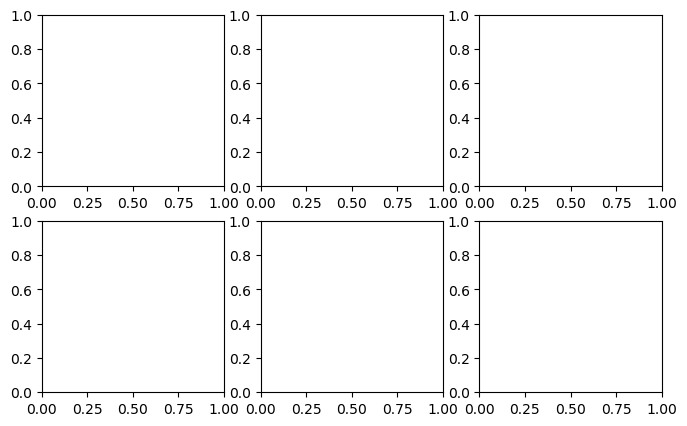

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(8, 5))
plt.show()

The first of the `plt.subplot()` parameters specifies the number of rows and the second the number of columns.
The graph looks a bit frustrating. In this case, you can use `plt.tight_layout()` to solve the frustration.

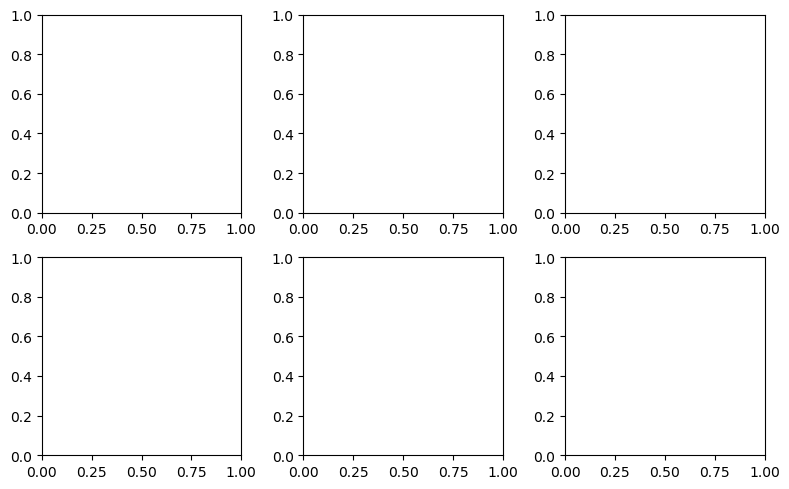

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(8, 5))
plt.tight_layout()
plt.show()

But should it be the same size depending on the subplot?
For example, bar graphs and pie charts are often very different in ratio.

In this case, the layout should be different.

In this case, you can easily use the grid system using `plt.subplot2grid`.
If you're a ***front-end developer***, it may be easier to understand.

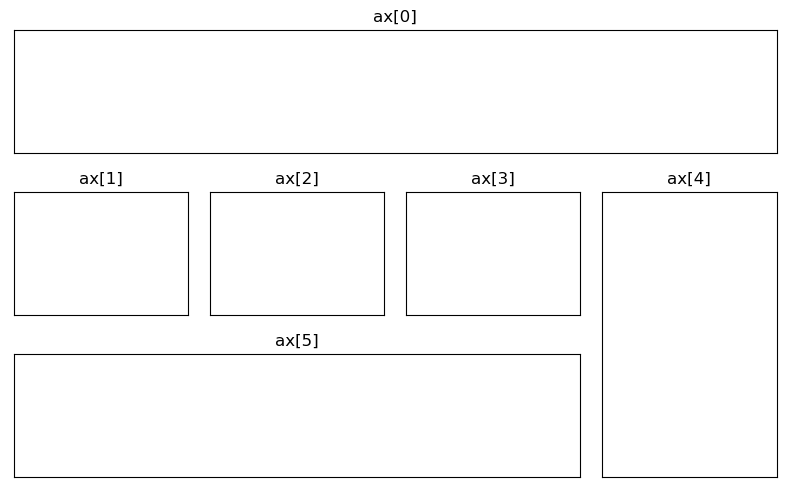

In [5]:
# with subplot2grid

fig = plt.figure(figsize=(8, 5)) # initialize figure

ax = [None for _ in range(6)] # list to save many ax for setting parameter in each

ax[0] = plt.subplot2grid((3,4), (0,0), colspan=4)
ax[1] = plt.subplot2grid((3,4), (1,0), colspan=1)
ax[2] = plt.subplot2grid((3,4), (1,1), colspan=1)
ax[3] = plt.subplot2grid((3,4), (1,2), colspan=1)
ax[4] = plt.subplot2grid((3,4), (1,3), colspan=1,rowspan=2)
ax[5] = plt.subplot2grid((3,4), (2,0), colspan=3)


for ix in range(6): 
    ax[ix].set_title('ax[{}]'.format(ix)) # make ax title for distinguish:)
    ax[ix].set_xticks([]) # to remove x ticks
    ax[ix].set_yticks([]) # to remove y ticks
    
fig.tight_layout()
plt.show()

Alternatively, you can use `plt.add_axes()` to create an ax where you want.

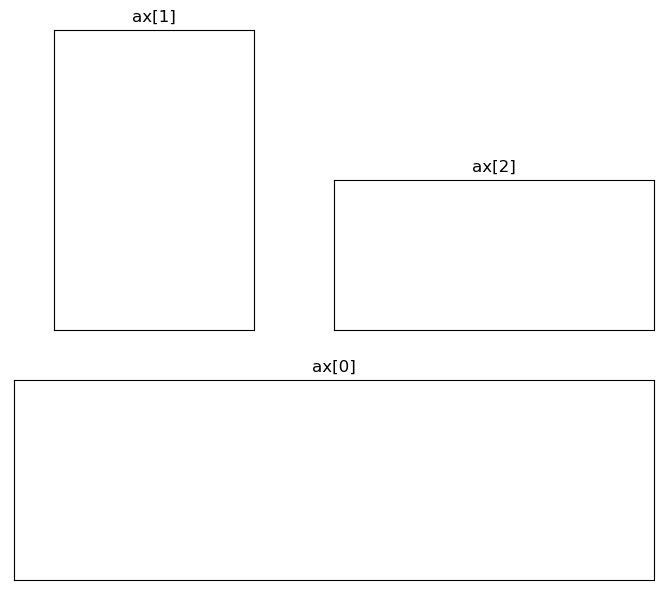

In [6]:
fig = plt.figure(figsize=(8, 5))

ax = [None for _ in range(3)]


ax[0] = fig.add_axes([0.1,0.1,0.8,0.4]) # x, y, dx, dy
ax[1] = fig.add_axes([0.15,0.6,0.25,0.6])
ax[2] = fig.add_axes([0.5,0.6,0.4,0.3])

for ix in range(3):
    ax[ix].set_title('ax[{}]'.format(ix))
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])

plt.show()

Another way is to use gridspec. This allows you to use `add_subplot` together, similar to subplots to grid.

This approach allows you to take advantage of the concept of `list` to use a developer-friendly grid.

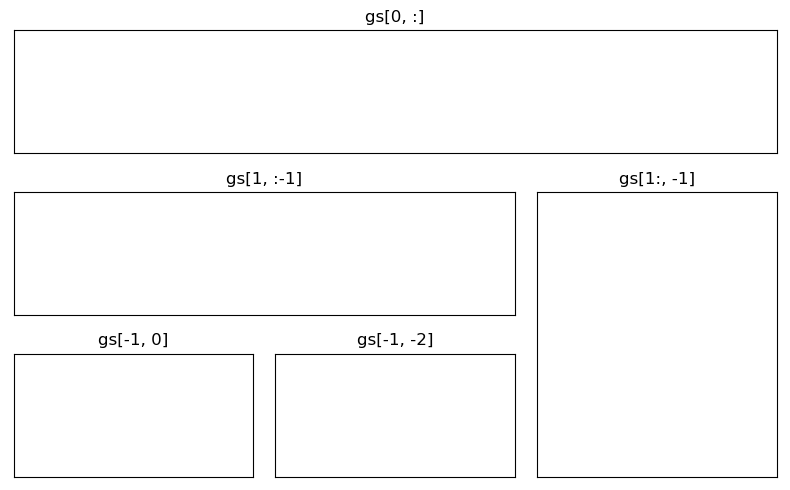

In [7]:
fig = plt.figure(figsize=(8, 5))

gs = fig.add_gridspec(3, 3) # make 3 by 3 grid (row, col)

ax = [None for _ in range(5)]

ax[0] = fig.add_subplot(gs[0, :]) 
ax[0].set_title('gs[0, :]')

ax[1] = fig.add_subplot(gs[1, :-1])
ax[1].set_title('gs[1, :-1]')

ax[2] = fig.add_subplot(gs[1:, -1])
ax[2].set_title('gs[1:, -1]')

ax[3] = fig.add_subplot(gs[-1, 0])
ax[3].set_title('gs[-1, 0]')

ax[4] = fig.add_subplot(gs[-1, -2])
ax[4].set_title('gs[-1, -2]')

for ix in range(5):
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])

plt.tight_layout()
plt.show()

Here you can change the color of ax or plt itself, such as facecolor, to make it look more dashboard-like.

## 2. Colormap

> [How to Choose Colors for Your Data Visualizations](https://medium.com/nightingale/how-to-choose-the-colors-for-your-data-visualizations-50b2557fa335)

Color is very important in the graph. Of course the matplotlib team has already created a good color palette, and we just need to use it.

This time, I'll show you the color palette in matplotlib and which graph to use.

- diverging
- qualitative
- sequential
- scientific

### Diverging Colormap

This colormap is usually used in visualizations where the median is obvious.

It is usually visualized on a white background, white in the center, and darker in color toward both ends. In other words, the lighter the value, the closer to the center, the darker, the closer to the end.

Useful for **expressing bias**, such as correlation and political disposition.

Currently it is a continuous colormap, but you can also use discrete colorpalette depending on the interval.

matplotlib loads the library's palette with that element in the `cmap` parameter. You can, of course, make it custom.

In [8]:
def cmap_plot(cmap_list, ctype):
    cmaps = cmap_list

    n = len(cmaps)

    fig = plt.figure(figsize=(8.25, n*.20), dpi=200)
    ax = plt.subplot(1, 1, 1, frameon=False, xlim=[0,10], xticks=[], yticks=[])
    fig.subplots_adjust(top=0.99, bottom=0.01, left=0.18, right=0.99)

    y, dy, pad = 0, 0.3, 0.08

    ticks, labels = [], []

    for cmap in cmaps[::-1]:
        Z = np.linspace(0,1,512).reshape(1,512)
        plt.imshow(Z, extent=[0,10,y,y+dy], cmap=plt.get_cmap(cmap))
        ticks.append(y+dy/2)
        labels.append(cmap)
        y = y + dy + pad

    ax.set_ylim(-pad,y)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)

    ax.tick_params(axis='y', which='both', length=0, labelsize=5)
    plt.title(f'{ctype} Colormap', fontweight='bold', fontsize=8)
    plt.show()


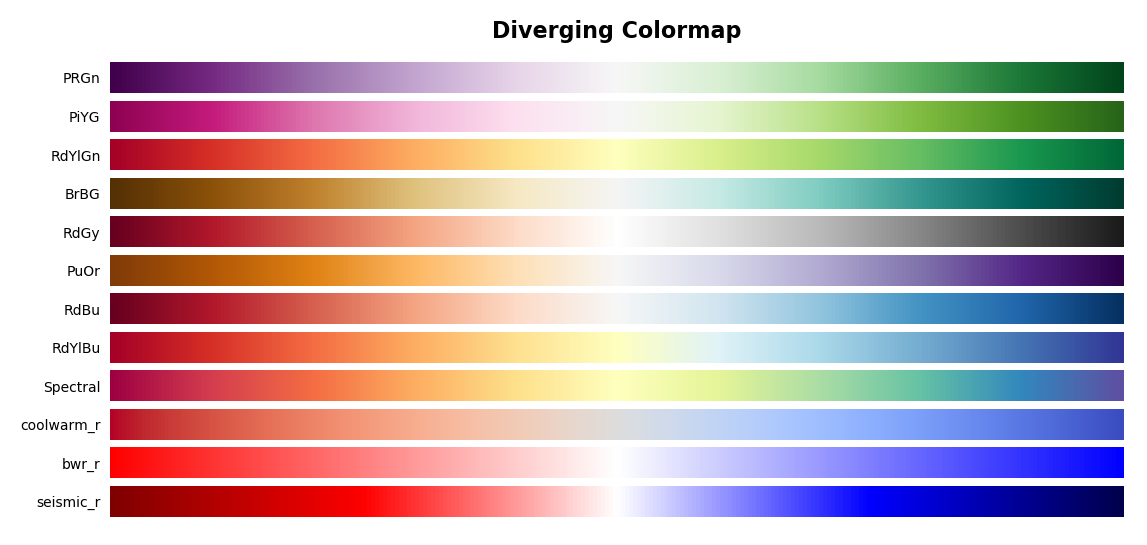

In [9]:
# _r mean reverse
diverge_cmap = ('PRGn', 'PiYG', 'RdYlGn', 'BrBG', 'RdGy', 'PuOr', 'RdBu', 'RdYlBu',  'Spectral', 'coolwarm_r', 'bwr_r', 'seismic_r')
cmap_plot(diverge_cmap, 'Diverging')

### Qualitative Colormap

A palette of independent colors, often used for **categorical variables**. 

It is recommended to organize up to 10 colors, and to group more and smaller categories with other. 

Repeating colors can be confusing, so ***try to avoid overlapping as much as possible.*** It's a good idea to change color to color rather than saturation and brightness.

Personally, I like `Set2` palette.

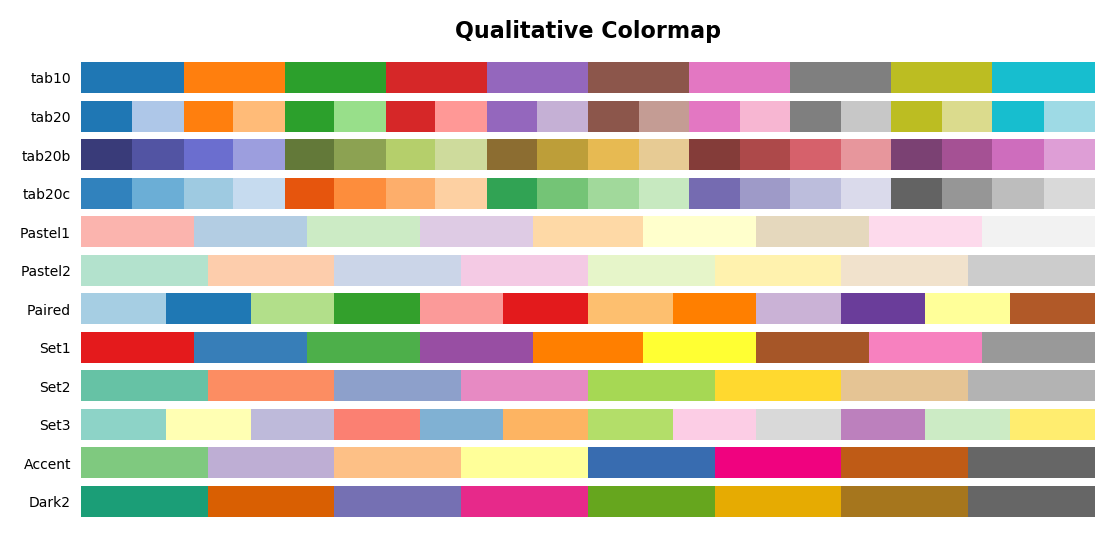

In [10]:
qualitative_cmap = ('tab10', 'tab20', 'tab20b', 'tab20c',
         'Pastel1', 'Pastel2', 'Paired',
         'Set1', 'Set2', 'Set3', 'Accent', 'Dark2' )

cmap_plot(qualitative_cmap, 'Qualitative')

Personally, I like to use this palette when visualizing after dimension reduction such as t-sne.

### Sequential Colormap

This palette is appropriate for variables with **numbers or sorted values**. 

Used a lot in **comparison** of figures. Especially effective for expressing density. Take advantage of map graphs for better visualization.

Similar to diverging, but with a slightly different part because each endpoint is a color criterion, not the median. It usually indicates that light values are dark on dark backgrounds and dark values on light backgrounds. 

It is recommended to use a single hue for the color.


Like diverging, it can also be used in **discrete form**.

> `_r` means *'reverse'*.

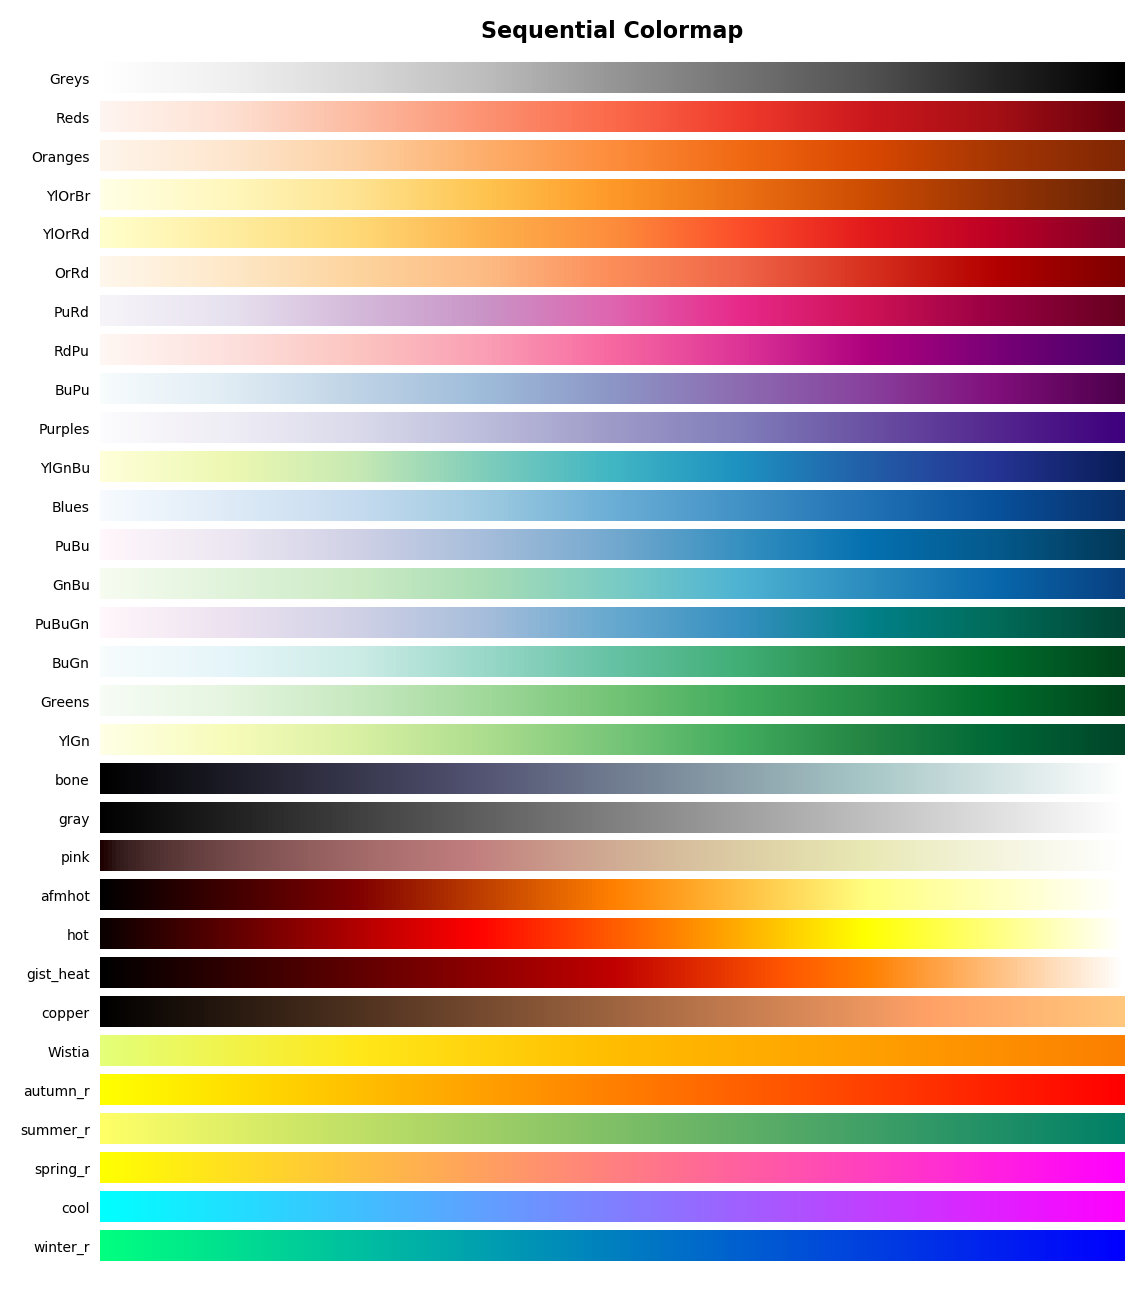

In [11]:
sequential_cmap = ('Greys', 'Reds', 'Oranges', 
         'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
         'Purples', 'YlGnBu', 'Blues', 'PuBu', 'GnBu', 'PuBuGn', 'BuGn',
         'Greens', 'YlGn','bone', 'gray', 'pink', 'afmhot', 'hot', 'gist_heat', 'copper', 
         'Wistia', 'autumn_r', 'summer_r', 'spring_r', 'cool', 'winter_r')            

cmap_plot(sequential_cmap, 'Sequential')

It can be used to give a gradual feeling or to check the emphasis of a particular part.

The following visualizations are possible:

In [12]:
netflix_date = netflix_titles[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

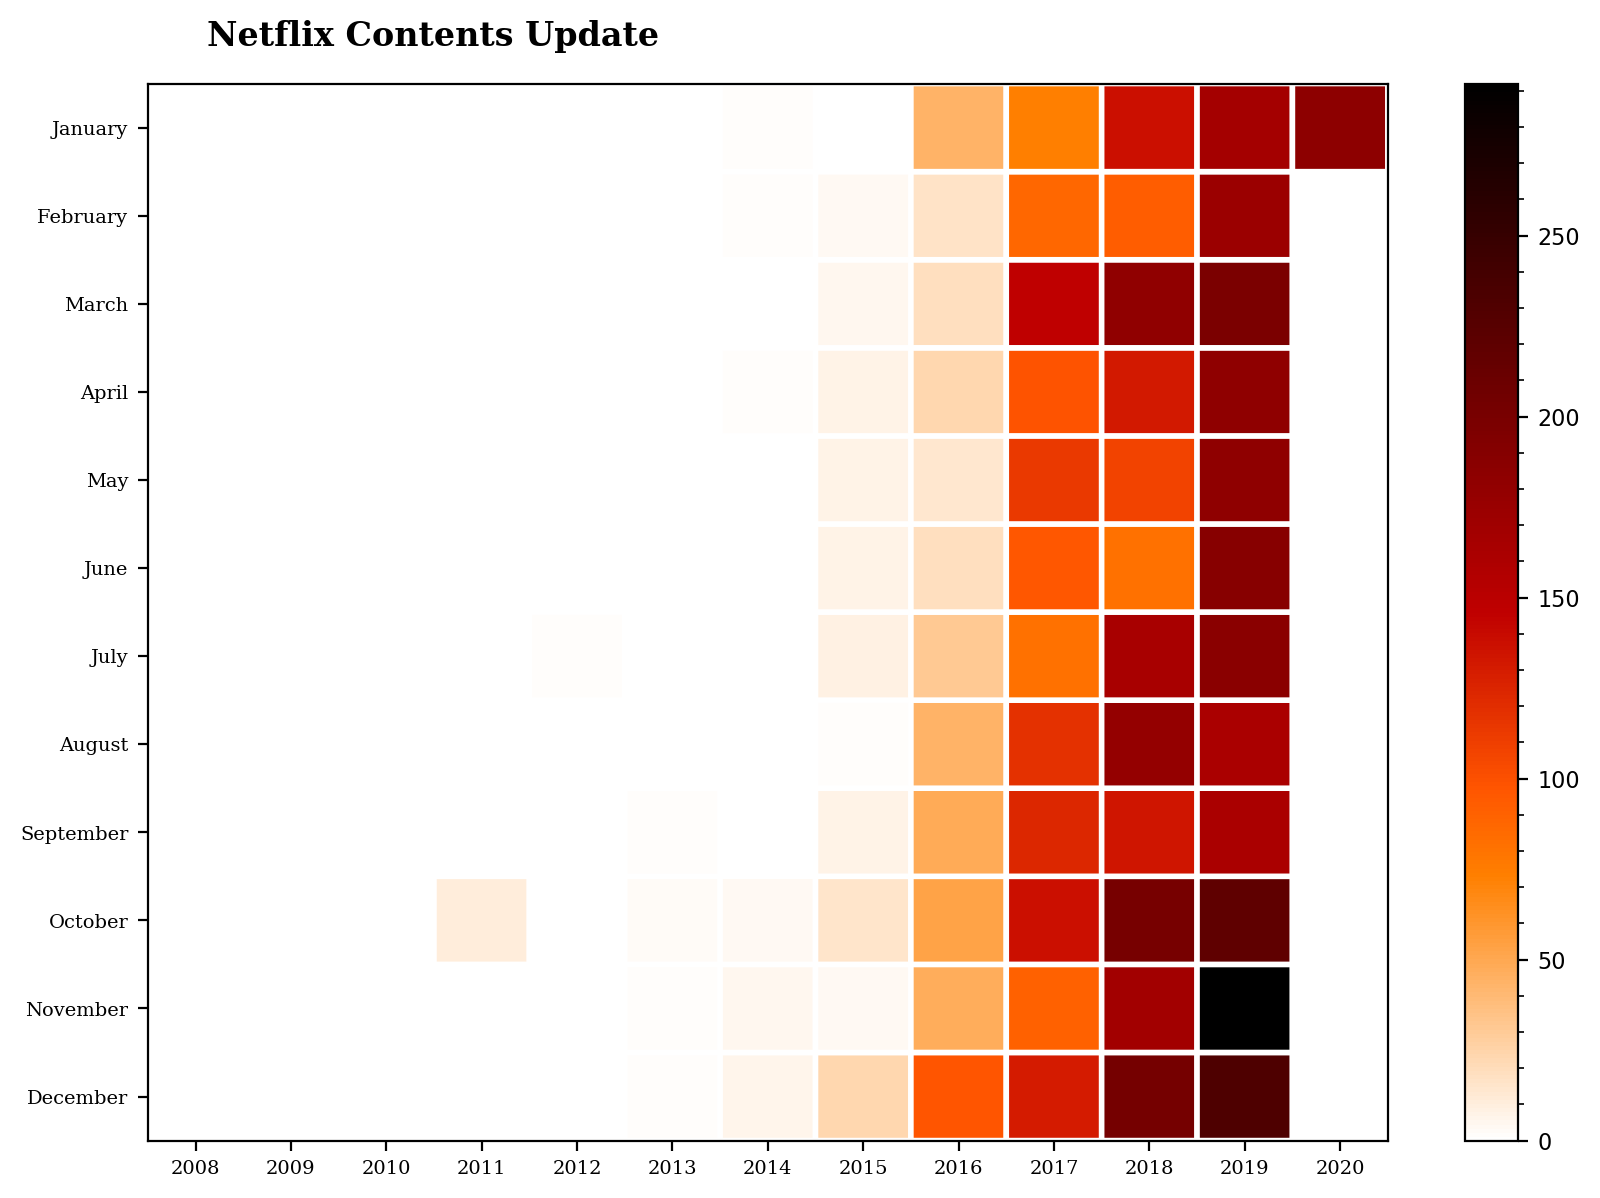

In [13]:
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='gist_heat_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='serif', fontweight='bold', position=(0.23, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

### Scientific Colormap

I don't know why, but it's used a lot in scientific visualization.
It is used as a basic colormap of plotly and has high utilization and relatively professional feel.

I've seen it often used in **signal data** like spectrograms when dealing with voice data.

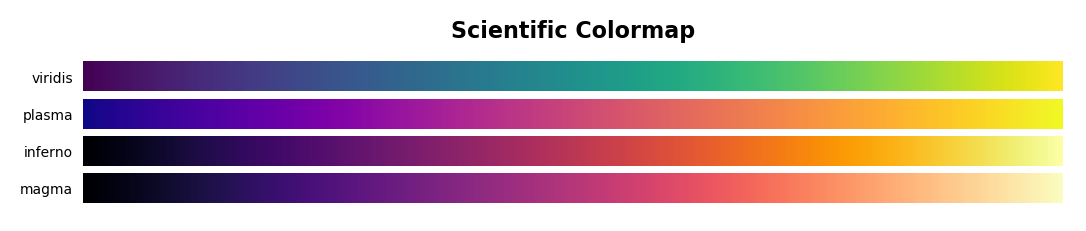

In [14]:
scientific_cmap = ('viridis', 'plasma', 'inferno', 'magma')
cmap_plot(scientific_cmap, 'Scientific')

## 3. Text & Annotate & Patch

Many people often end up with just a picture in the graph, but the detail of the graph comes from the description. Just putting text on a specific part can change the feel of the graph.

`ax.text` and `ax.annotate` are almost similar, but each has a different purpose.

- In `ax.text`, The `first two numbers` represent the ratio coordinates in the graph. 
- In `ax.annotate`, `xy` represent the coordinates in the graph. 

- `va`, `ha` is a parameter that determines whether the current coordinate is the center of the text or the left / right of the text.
- `color` stands for color, and you can enter a custom color or rgb value directly.
- `bbox` sets an element for the box that wraps the text.
    - Internal color (`facecolor`) and edge color(`edgecolor`) can be set separately.
    - You can adjust the space by setting `pad`ding like in html.
    - You can use the `boxstyle` to adjust the end of the rectangle.

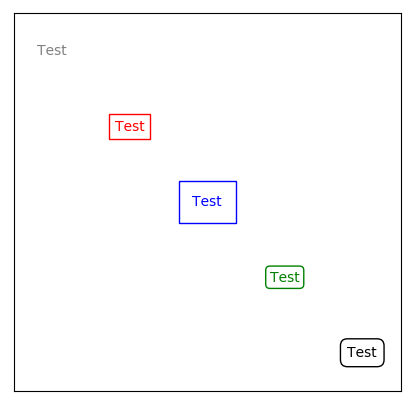

In [15]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)

## Gray Box
ax.text(0.1, 0.9, 'Test', color='gray', va="center", ha="center")

## Red Box
ax.text(0.3, 0.7, 'Test', color='red', va="center", ha="center",
        bbox=dict(facecolor='none', edgecolor='red'))

## Blue Box
ax.text(0.5, 0.5, 'Test', color='blue', va="center", ha="center",
        bbox=dict(facecolor='none', edgecolor='blue', pad=10.0))

# Green Box
ax.text(0.7, 0.3, 'Test', color='green', va="center", ha="center",
        bbox=dict(facecolor='none', edgecolor='green', boxstyle='round'))

# Black
ax.text(0.9, 0.1, 'Test', color='black', va="center", ha="center",
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round, pad=0.5'))

ax.set_xticks([])
ax.set_yticks([])

plt.show()

Using a patch with text is more effective.

Except for path patches, they are provided by default, so you can use them well.

**Arrow is especially effective.**

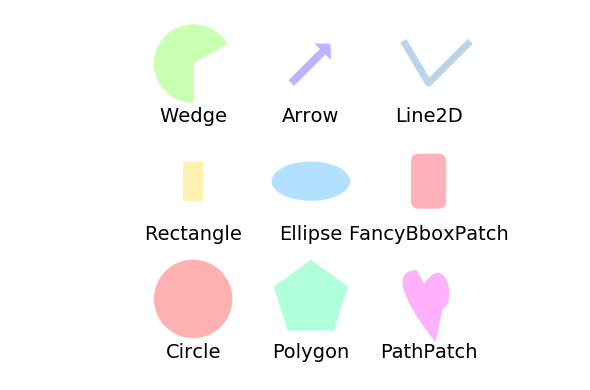

In [16]:
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection


def label(xy, text):
    y = xy[1] - 0.15  # shift y-value for label so that it's below the artist
    plt.text(xy[0], y, text, ha="center", family='sans-serif', size=14)


fig, ax = plt.subplots()
# create 3x3 grid to plot the artists
grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T

patches = []

# add a circle
circle = mpatches.Circle(grid[0], 0.1, ec="none")
patches.append(circle)
label(grid[0], "Circle")

# add a rectangle
rect = mpatches.Rectangle(grid[1] - [0.025, 0.05], 0.05, 0.1, ec="none")
patches.append(rect)
label(grid[1], "Rectangle")

# add a wedge
wedge = mpatches.Wedge(grid[2], 0.1, 30, 270, ec="none")
patches.append(wedge)
label(grid[2], "Wedge")

# add a Polygon
polygon = mpatches.RegularPolygon(grid[3], 5, 0.1)
patches.append(polygon)
label(grid[3], "Polygon")

# add an ellipse
ellipse = mpatches.Ellipse(grid[4], 0.2, 0.1)
patches.append(ellipse)
label(grid[4], "Ellipse")

# add an arrow
arrow = mpatches.Arrow(grid[5, 0] - 0.05, grid[5, 1] - 0.05, 0.1, 0.1,
                       width=0.1)
patches.append(arrow)
label(grid[5], "Arrow")

# add a path patch
Path = mpath.Path
path_data = [
    (Path.MOVETO, [0.018, -0.11]),
    (Path.CURVE4, [-0.031, -0.051]),
    (Path.CURVE4, [-0.115, 0.073]),
    (Path.CURVE4, [-0.03, 0.073]),
    (Path.LINETO, [-0.011, 0.039]),
    (Path.CURVE4, [0.043, 0.121]),
    (Path.CURVE4, [0.075, -0.005]),
    (Path.CURVE4, [0.035, -0.027]),
    (Path.CLOSEPOLY, [0.018, -0.11])]
codes, verts = zip(*path_data)
path = mpath.Path(verts + grid[6], codes)
patch = mpatches.PathPatch(path)
patches.append(patch)
label(grid[6], "PathPatch")

# add a fancy box
fancybox = mpatches.FancyBboxPatch(
    grid[7] - [0.025, 0.05], 0.05, 0.1,
    boxstyle=mpatches.BoxStyle("Round", pad=0.02))
patches.append(fancybox)
label(grid[7], "FancyBboxPatch")

# add a line
x, y = np.array([[-0.06, 0.0, 0.1], [0.05, -0.05, 0.05]])
line = mlines.Line2D(x + grid[8, 0], y + grid[8, 1], lw=5., alpha=0.3)
label(grid[8], "Line2D")

colors = np.linspace(0, 1, len(patches))
collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.3)
collection.set_array(np.array(colors))
ax.add_collection(collection)
ax.add_line(line)

plt.axis('equal')
plt.axis('off')
plt.tight_layout()

plt.show()

## 4. Details & Examples

In the plot you can make various settings. 

> Of course, adding the text or annotate mentioned above is a good idea.

**You can set the following details:**

- Horizontal and Vertical (barplot)
- Border(edge) color and thickness
- Main Color & Sub Color
- Transparency
- Span

### Font Weight, Color, Family, Size ...

I usually set the details in font weight and size. It is good because it is easy to see just by setting it to bold. Also, if the size of the text is too big or too small, the proportions are strange.

The fonts do not vary, but the difference between serifs and sans serifs can make a difference.

The **Tex** syntax is also applicable, so use that as well.

- **keyword** : `fontsize`, `color`, `fontweight`, `fontfamily`

### Horizontal keyboard & Vertical (barplot)

In general, when the number of x-axes is large, the **readability** of the barplot is significantly lower.

For example, seaborn's `countplot` often overlaps the x-axis and often makes it less readable.

This is due to the fact that in a notebook environment, the width is the length of the monitor.

So in this case, you can place the graph vertically so that the axes are well read and the graph is easier to read.

### Border(Edge) Color & Thickness (Width)

The point is to make the graph more readable by **drawing separate borders** than simply drawing the graph.

There are many examples of drawing the borders of graphs in R notebooks, so it's good to refer to those parts as well.

Borders are a good tool because people focus on color, shape, and contrast.

The border lines should be solid color or the main color series of the graph, and it is better to make the distinction by adjusting the **transparency or brightness**.

### Main Color & Sub Color

If you draw a plot of seaborn, it is displayed in various colors by default. You can draw various colorful graphs while changing the palette.

But basically, the visualization should focus on information, so it's not always nice to have a colorful plot.

Rather, think about what data you want to focus on.
It is better to make a difference between the main color with **strong color** and the sub color of **achromatic color** system.

Alternatively, it is a good idea to choose the palette according to the application mentioned above.

In the case of a colormap, you can ***select a palette or pass it to a list***, so it is convenient to pass it to a list when highlighting a specific part.

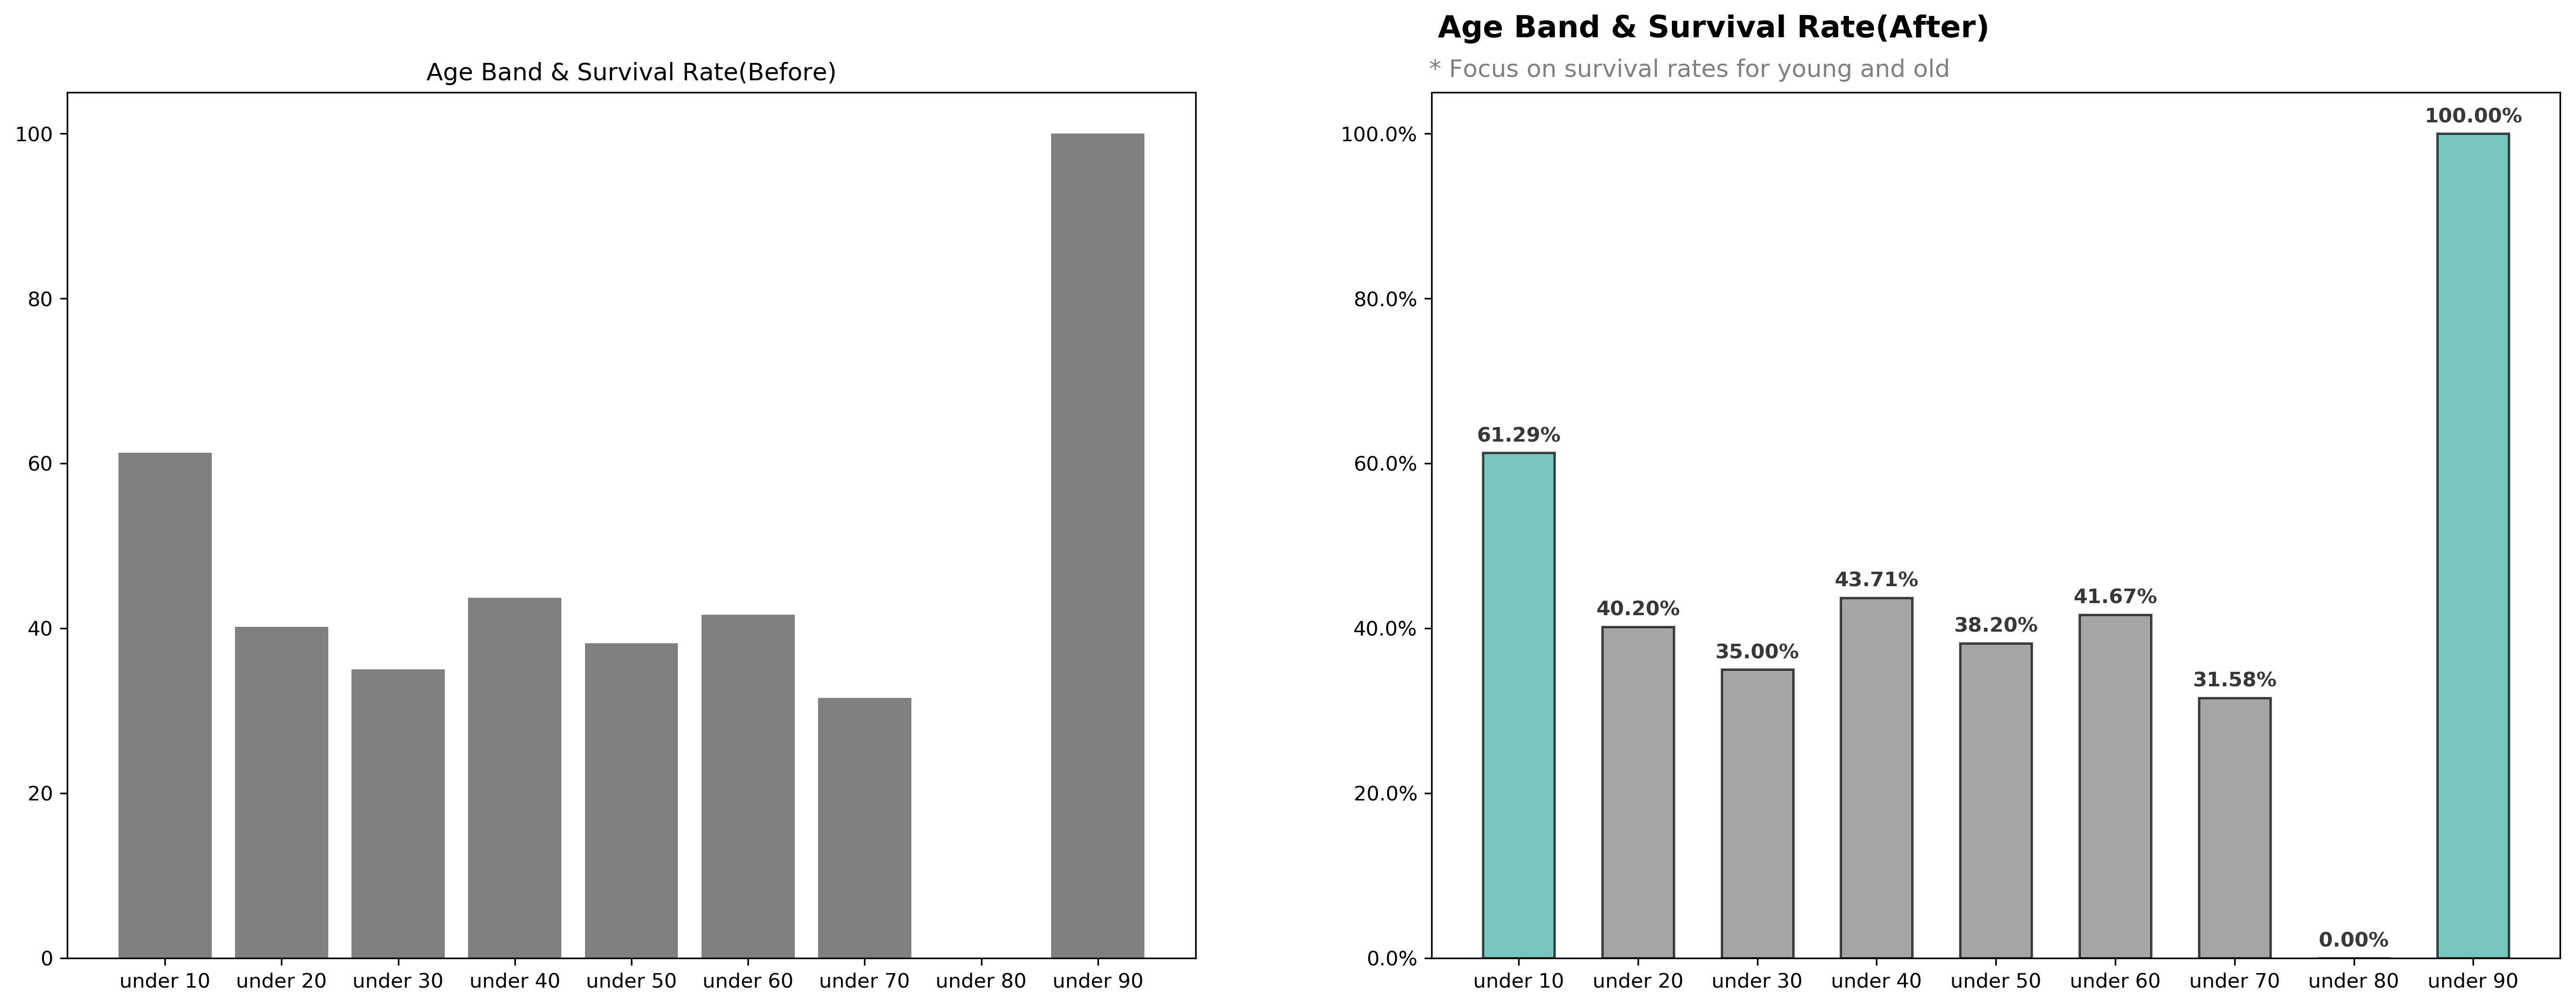

In [17]:
from matplotlib.ticker import FuncFormatter
def age_band(num):
    for i in range(1, 100):
        if num < 10*i : 
            return f'under {i*10}'
 
titanic_train = pd.read_csv("../input/titanic/train.csv")
titanic_train['age_band'] = titanic_train['Age'].apply(age_band)
titanic_age = titanic_train[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)

titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

fig, ax = plt.subplots(1, 2, figsize=(18, 7), dpi=300)

# ax1
ax[0].bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], color='gray')
ax[0].set_title('Age Band & Survival Rate(Before)')

# ax2
color_map = ['gray' for _ in range(9)]
color_map[0] = color_map[8] = '#3caea3'
ax[1].bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], alpha=0.7, color=color_map, width=0.6, edgecolor='black', linewidth=1.2)
ax[1].set_title('Age Band & Survival Rate(After)', fontsize=15, fontweight='bold', position=(0.25, 1.0+0.05))
for i in titanic_age['Survival rate'].index:
    ax[1].annotate(f"{titanic_age['Survival rate'][i]:.02f}%", 
                   xy=(i, titanic_age['Survival rate'][i] + 2),
                   va = 'center', ha='center',fontweight='bold', color='#383838'
                  )

ax[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:}%')) 
plt.suptitle('* Focus on survival rates for young and old', x=0.65, y=0.94, color='gray')
plt.subplots_adjust(left=0.5, right=0.8)
plt.tight_layout()
plt.show()

### Transparency

I told you to use transparency above, but transparency is a great tool.

Scatter plots also contain important points with many **overlapping** points. That's why it's important to know the overlapping data by adjusting transparency.

When **comparing** lineplots or barplots, placing two or more plots together using transparency allows you to hold comparison information.

If you add transparency to the graph, you can complete the graph with refined colors.

- `alpha` : Parameter name of normal transparency setting

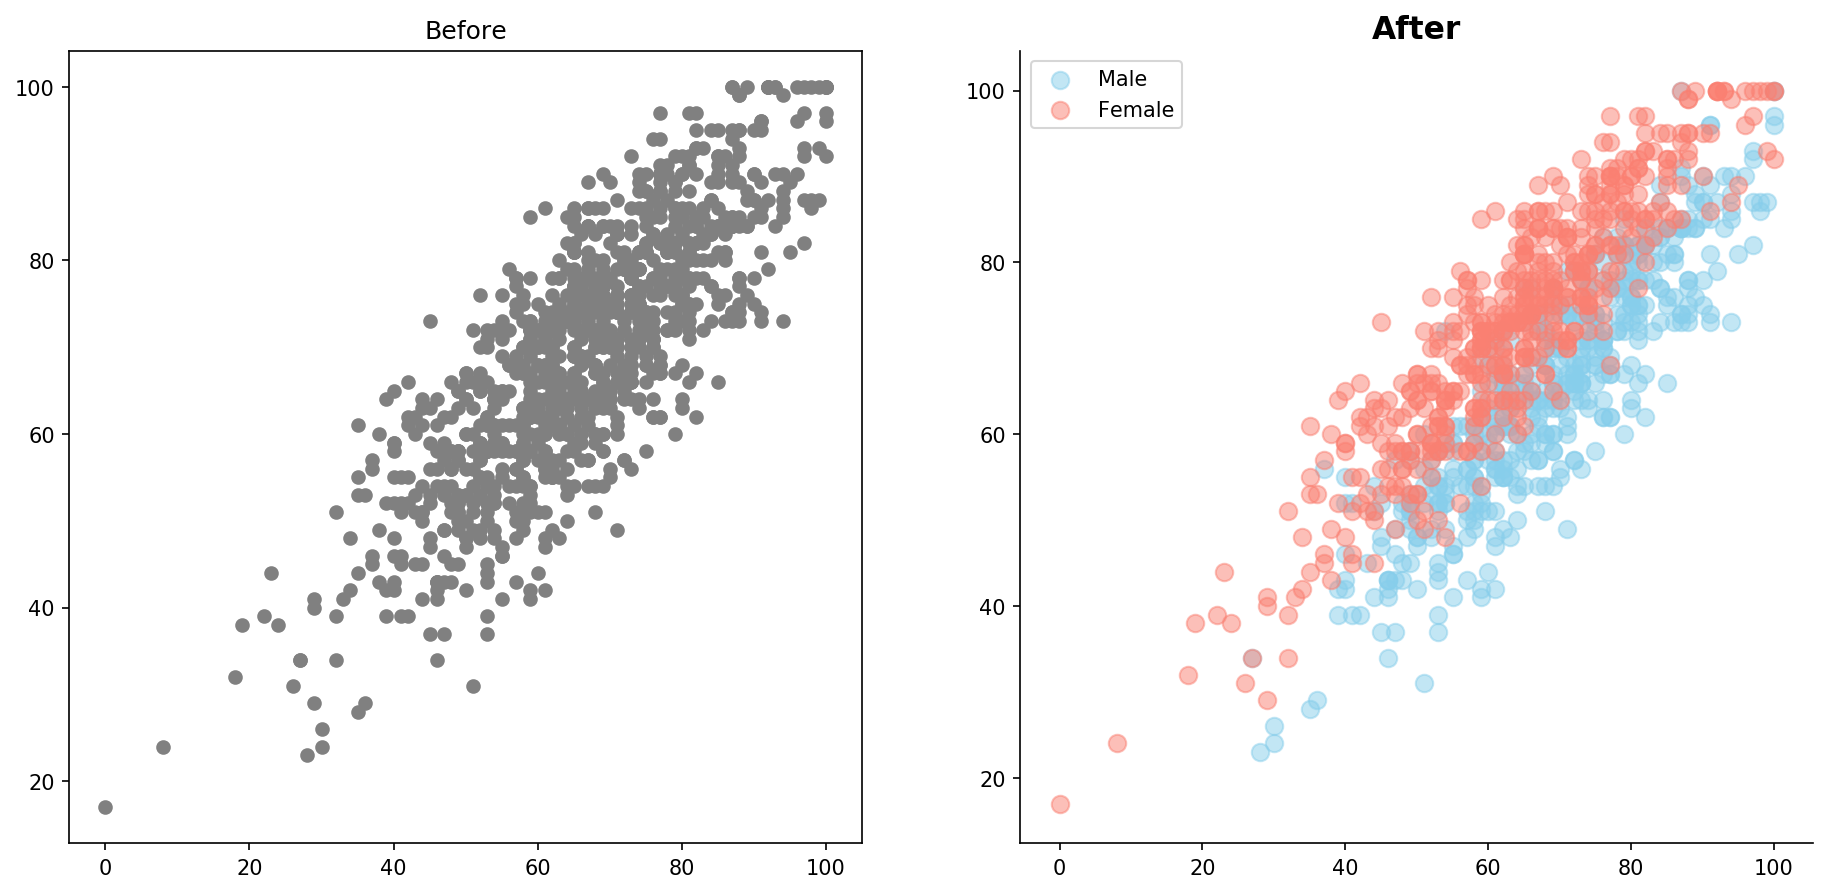

In [18]:
import seaborn as sns
exam_data = pd.read_csv("../input/students-performance-in-exams/StudentsPerformance.csv")
fig, ax = plt.subplots(1, 2, figsize = (15, 7), dpi=150)

ax[0].scatter(x='math score', y='reading score',data=exam_data, color='gray')
ax[0].set_title('Before')

# You can use sns.scatterplot + hue parameter
ax[1].scatter(x='math score', y='reading score',data=exam_data[exam_data['gender']=='male'], color='skyblue', alpha=0.5, label='Male', s=70)
ax[1].scatter(x='math score', y='reading score',data=exam_data[exam_data['gender']=='female'], color='salmon', alpha=0.5, label='Female', s=70)
ax[1].set_title('After', fontsize=15, fontweight='bold')

ax[1].legend()

# upper & right border remove 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

### Span

Good division is enough to give points. Zoning can be added for a variety of reasons, depending on the content or to classify units.

- `axvspan` : vertical span
- `axhspan` : horizontal span

you can set color, alpha(transparency), range, etc

In [19]:
# preprocessing
sns.set_style('whitegrid') # plot with grid

movie = netflix_titles[netflix_titles['type'] == 'Movie']    
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
movie_rating = movie['rating'].value_counts()[rating_order]    

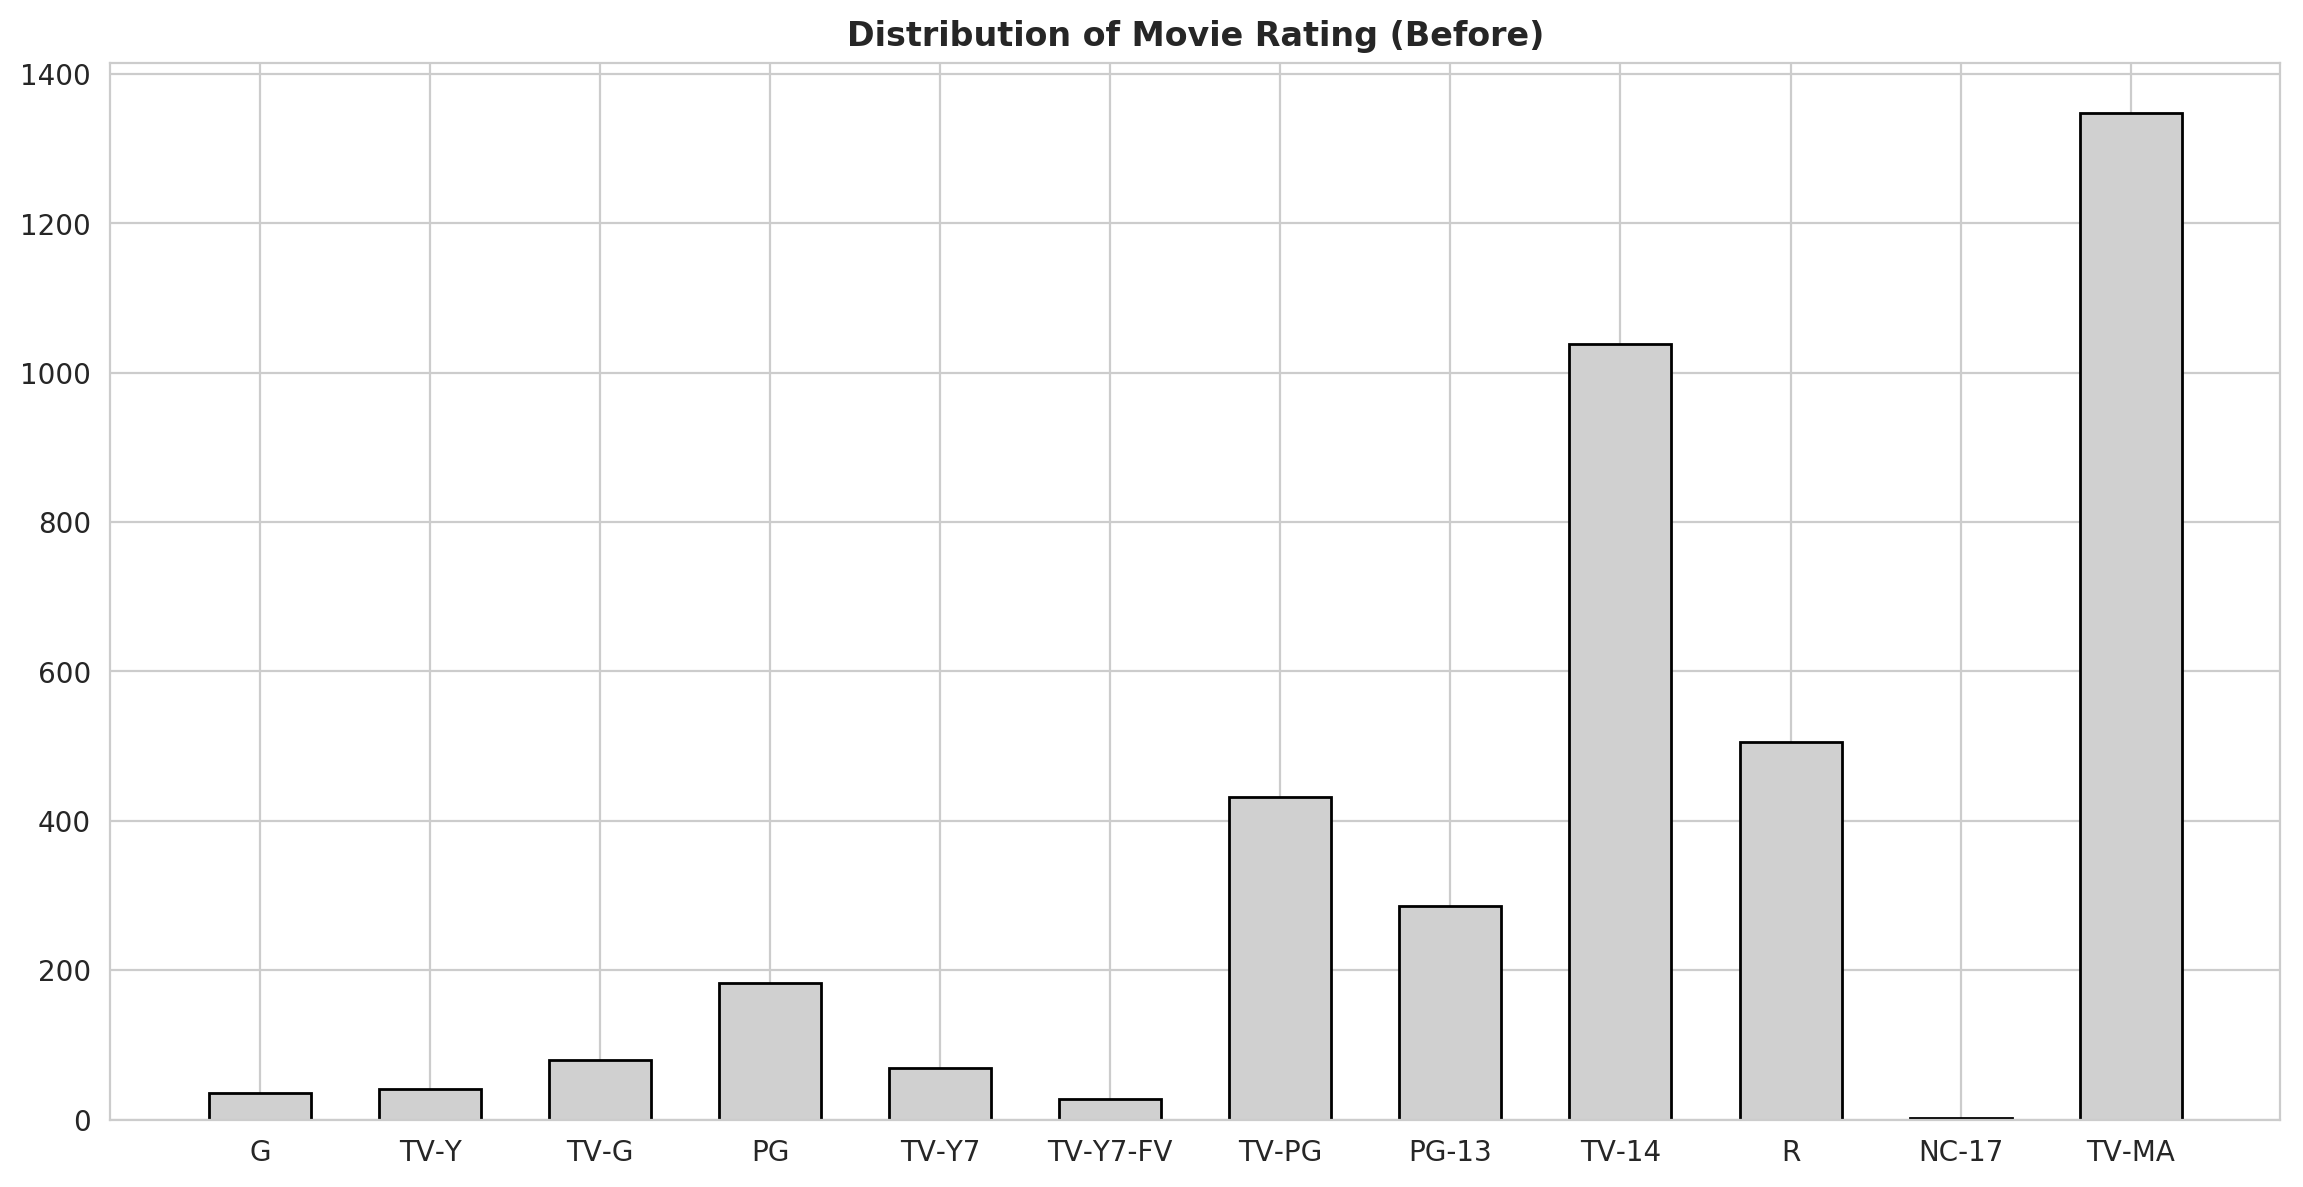

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=200)
ax.bar(movie_rating.index, movie_rating,  color="#d0d0d0", width=0.6, edgecolor='black')
ax.set_title(f'Distribution of Movie Rating (Before)', fontweight='bold')
plt.show()

If you just use span and add text, you can change it as follows.
(The title bold processing is below.)

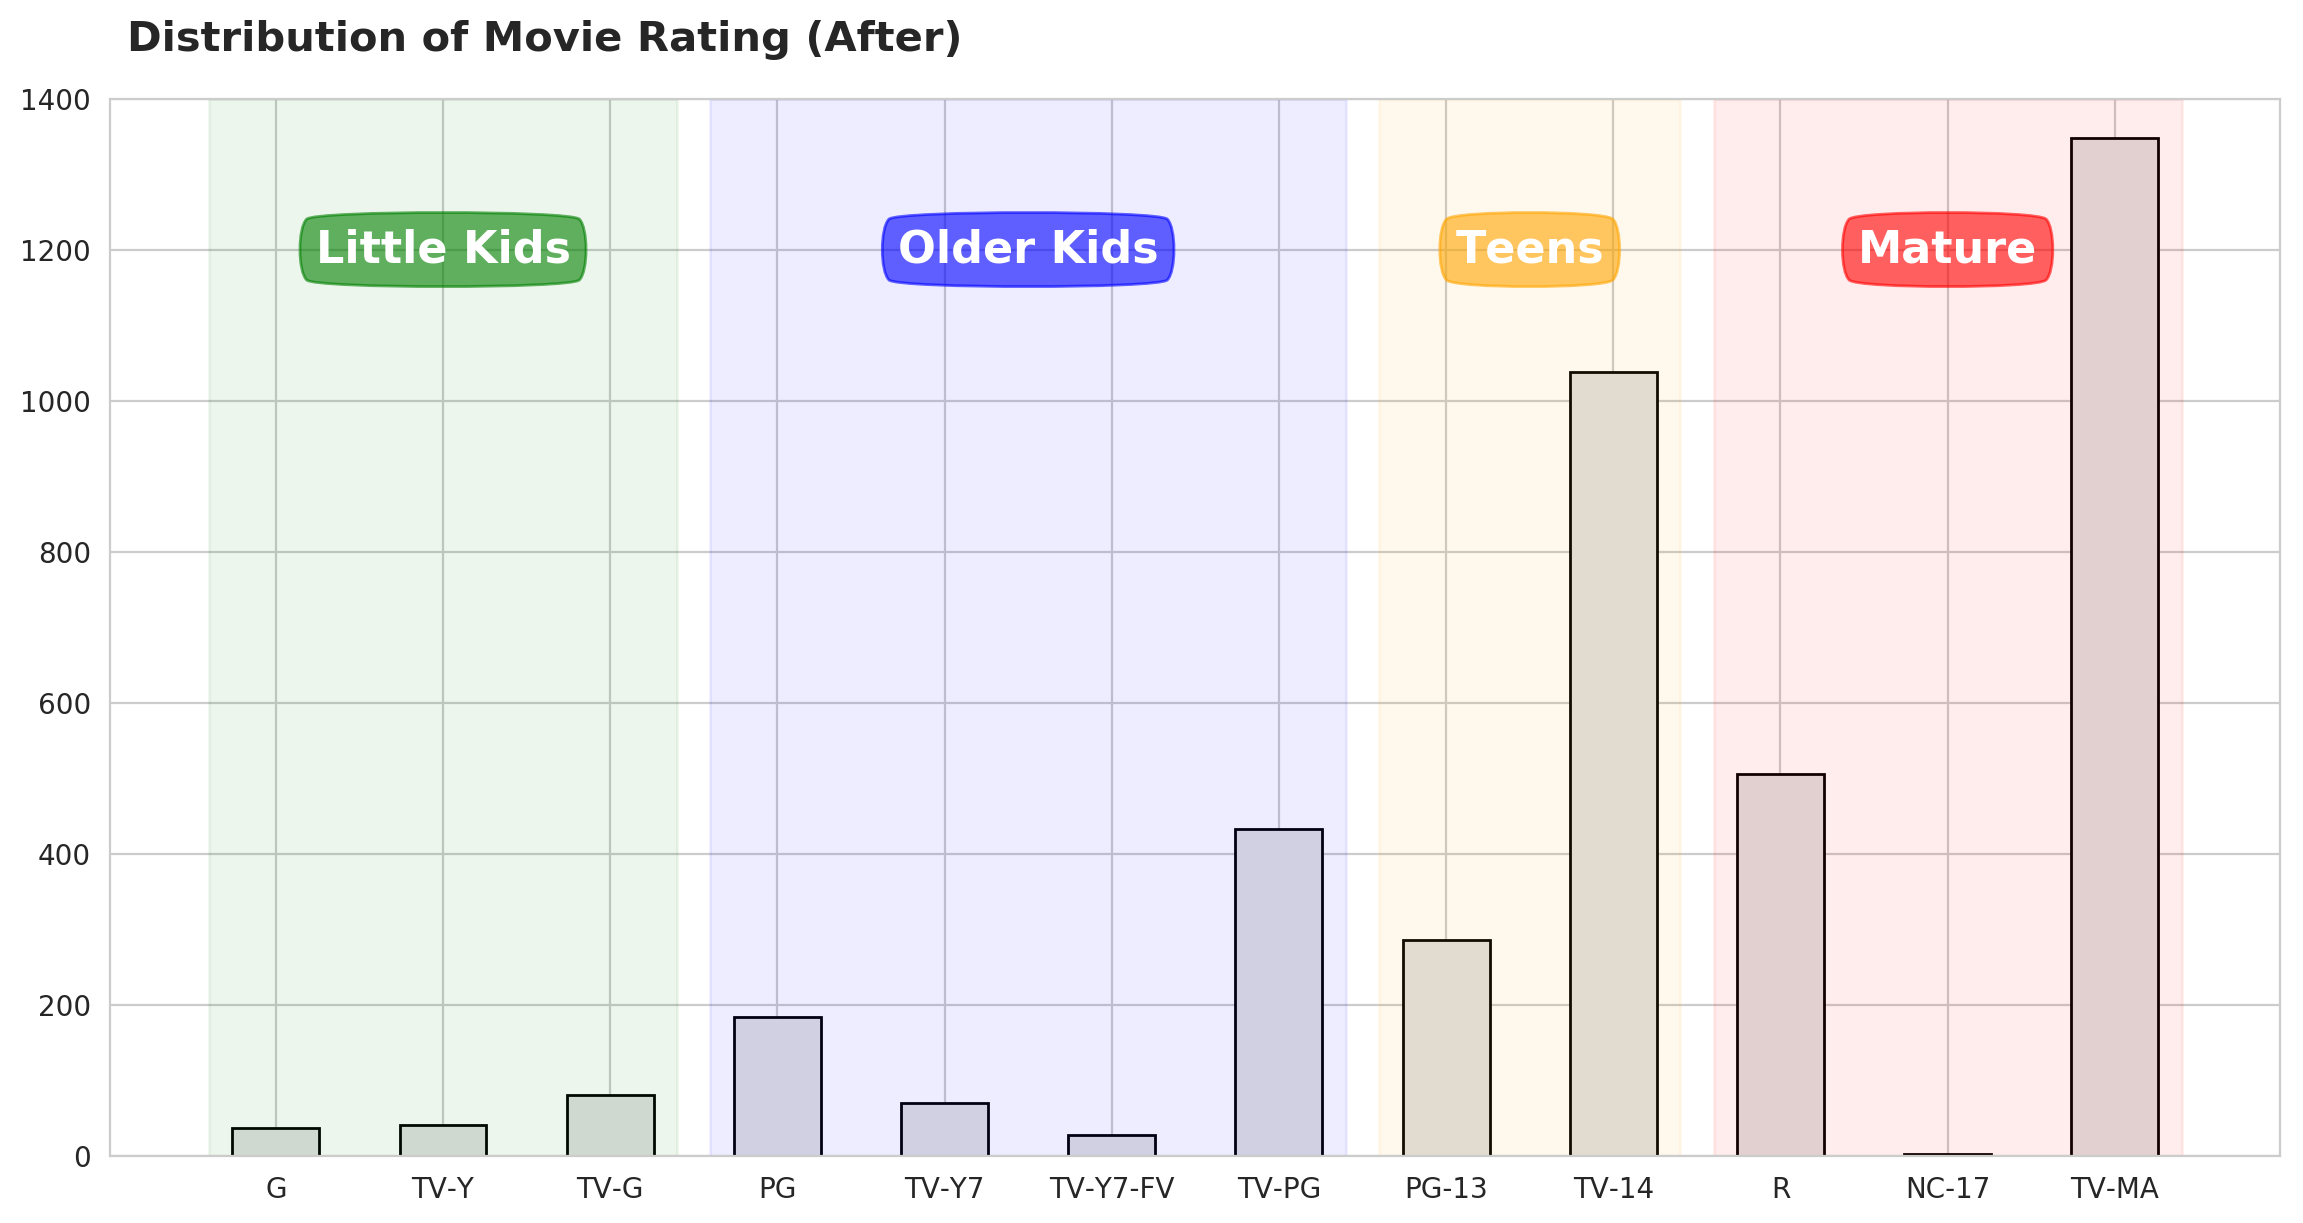

In [21]:
# original code : https://www.kaggle.com/subinium/storytelling-with-data-netflix-ver


def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(14, 7), dpi=200)
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#e0e0e0", width=0.52, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.07)
    ax.set_title(f'Distribution of {title} Rating (After)', fontsize=15, fontweight='bold', position=(0.20, 1.0+0.03))
    plt.show()
    


rating_barplot(movie_rating,'Movie', 1200, 1400)

## MEME : xkcd theme

- [xkcd](https://xkcd.com/) : Webcomic for Geeks

> Depending on the current kaggle and version, the font is broken, but you can draw a graph like this:

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


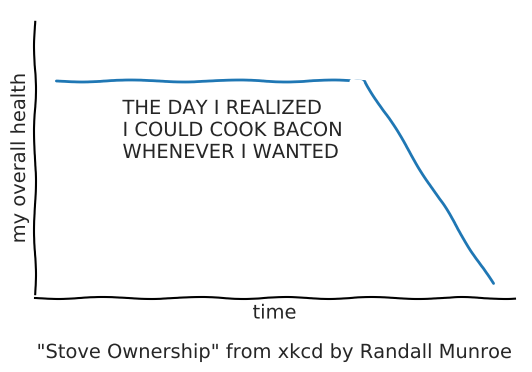

In [22]:
import matplotlib
matplotlib.font_manager._rebuild()
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Munroe
    # https://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    ax.plot(data)

    ax.set_xlabel('time')
    ax.set_ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


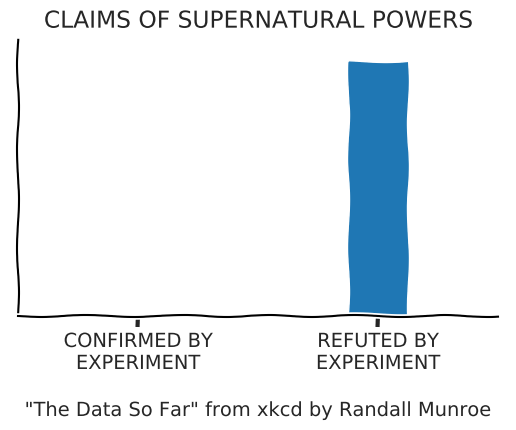

In [23]:
with plt.xkcd():
    # Based on "The Data So Far" from XKCD by Randall Munroe
    # https://xkcd.com/373/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([0, 1], [0, 100], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    ax.set_xlim([-0.5, 1.5])
    ax.set_yticks([])
    ax.set_ylim([0, 110])

    ax.set_title("CLAIMS OF SUPERNATURAL POWERS")

    fig.text(
        0.5, -0.05,
        '"The Data So Far" from xkcd by Randall Munroe',
        ha='center')

plt.show()

> I am writing a book in Korea for [Data Visualization Using Python Library]. I'll be writing books soon and sharing example kernels, so look forward to it.